In [1]:
# importing required modules
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
import warnings
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.
c:\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
# VGG 16 CNN Architecture
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(272, 363, 3)),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The fourth convolution
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The Fifth convolution
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')
])


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 272, 363, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 272, 363, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 136, 181, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 136, 181, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 68, 90, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 68, 90, 256)       295168    
____

# 

In [4]:
# model is sequential
model = Sequential()

# adding Conv Blocks with relu activation and Max pooling
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(272,363,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(272,363,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(272,363,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(272,363,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

# classifier layers
model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.3))

# Prediction layer
model.add(Dense(25))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 270, 361, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 135, 180, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 133, 178, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 66, 89, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 87, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 43, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 41, 64)      

In [5]:
#from pathlib import Path

#root_dir = path_images
#root = Path(root_dir)

In [6]:
#rm -rf `find -type d -name .ipynb_checkpoints`

In [7]:
# augmenting the ibput imges
image_gen = ImageDataGenerator(width_shift_range=0.1, # Shift the pic width by a max of 10%
                               validation_split = 0.3, # Split the Data into 80,20 %
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )
# initializing paths of input images         
path_images = 'Dataset/train'
image_gen.flow_from_directory(path_images)
#image_gen.flow_from_directory('/home/ec2-user/SageMaker/Training_Data/Corn_Valid_Data')

#print(image_gen)

batch_size = 32
image_shape = (272,363,3)

# train on images
train_image_gen = image_gen.flow_from_directory(path_images,
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                                shuffle = True,
                                                subset='training',
                                               class_mode='categorical')

valid_image_gen = image_gen.flow_from_directory(path_images,
                                                target_size=image_shape[:2],
                                               batch_size=batch_size,
                                                shuffle = True,
                                                subset='validation',
                                               class_mode='categorical')

Found 25414 images belonging to 25 classes.
Found 17799 images belonging to 25 classes.
Found 7615 images belonging to 25 classes.


In [8]:
valid_image_gen.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Grape___Black_rot': 4,
 'Grape___Esca_(Black_Measles)': 5,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 6,
 'Grape___healthy': 7,
 'Peach___Bacterial_spot': 8,
 'Peach___healthy': 9,
 'Potato___Early_blight': 10,
 'Potato___Late_blight': 11,
 'Potato___healthy': 12,
 'Strawberry___Leaf_scorch': 13,
 'Strawberry___healthy': 14,
 'Tomato___Bacterial_spot': 15,
 'Tomato___Early_blight': 16,
 'Tomato___Late_blight': 17,
 'Tomato___Leaf_Mold': 18,
 'Tomato___Septoria_leaf_spot': 19,
 'Tomato___Spider_mites Two-spotted_spider_mite': 20,
 'Tomato___Target_Spot': 21,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 22,
 'Tomato___Tomato_mosaic_virus': 23,
 'Tomato___healthy': 24}

In [9]:
pwd

'C:\\Users\\Murtaza\\Plant_Diseases'

In [11]:
warnings.filterwarnings('ignore')

#es = EarlyStopping(monitor='val_acc', mode='max', verbose=1 , patience = 10)
cb = []
checkpoint_dir = 'Checkpoints'
ckp_saver = ModelCheckpoint(checkpoint_dir + "/model.{epoch:02d}-{loss:.2f}.h5", monitor='loss', verbose=0,
                                    save_best_only=True,
                                    save_weights_only=True, mode='auto', period=10)
cb.append(ckp_saver)


results = model.fit_generator(train_image_gen,epochs=50,
                              steps_per_epoch=train_image_gen.samples//batch_size,
                              validation_data=valid_image_gen,
                             validation_steps=valid_image_gen.samples//batch_size,
                             callbacks=cb)
model.save('Plant_Classifier_70_30.h5')

Epoch 1/50
 31/556 [>.............................] - ETA: 4:12 - loss: 0.1649 - accuracy: 0.9466

KeyboardInterrupt: 

In [3]:

import matplotlib.pyplot as plt
acc = results.history['acc']
val_acc = results.history['val_acc']
loss = results.history['loss']
val_loss = results.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'blue', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.plot(epochs, loss, 'blue', label='Training Loss')
plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

NameError: name 'results' is not defined

In [4]:
import matplotlib.pyplot as plt

def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title("Cross Entropy Loss")
    plt.plot(history.history["loss"], color="blue", label="train")
    plt.plot(history.history["val_loss"], color="orange", label="test")
    plt.legend()
    # plot accuracy
    plt.tight_layout()
    plt.subplot(212)
    plt.title("Classification Accuracy")
    plt.plot(history.history["acc"], color="blue", label="train")
    plt.plot(history.history["val_acc"], color="orange", label="test")
    plt.legend()
    # save plot to file
    plt.savefig("Model Performance 70_30.png")
    plt.close()
    
summarize_diagnostics(results)

NameError: name 'results' is not defined

In [10]:
loaded_model = load_model('Plant_Classifier.h5')
loaded_model.layers[0].input_shape #(None, 160, 160, 3)
loaded_model.summary()

ValueError: Unknown initializer: GlorotUniform

In [18]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory('Dataset/val',
                                                        target_size=image_shape[:2],
                                                        batch_size=batch_size,
                                                        shuffle = False,
                                                        class_mode='categorical')

Found 6353 images belonging to 25 classes.


In [26]:
import numpy as np
test_generator.reset()
Y_pred = model.predict_generator(test_generator, 6353 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
print(classification_report(test_generator.classes, y_pred)

SyntaxError: unexpected EOF while parsing (<ipython-input-26-fbddb7b2f9ea>, line 8)

In [27]:
import numpy as np
test_generator.reset()
Y_pred = model.predict_generator(test_generator, 6353 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

In [28]:
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

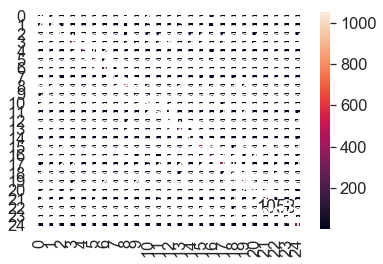

In [32]:
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

def Confusion_Matrix_Built_IN():

    CM = confusion_matrix(test_generator.classes, y_pred)
    #print(CM)
    df_cm = pd.DataFrame(CM, range(25), range(25))

    sn.set(font_scale=1.5)#for label size
    sn.heatmap(df_cm,vmin=1,vmax=max(CM.diagonal()),linewidth=5 ,annot=True,fmt="d",xticklabels=True, yticklabels=True)# font size
    
    plt.show()

Confusion_Matrix_Built_IN()

In [16]:
test_score = model.evaluate_generator(test_generator , 1200 // batch_size)

NameError: name 'test_generator' is not defined

In [72]:
test_score

[0.9690494214495023, 0.71]

In [73]:
validation_score = model.evaluate_generator(valid_image_gen , 600 // 16)
validation_score

[0.8750278802767192, 0.7191780821917808]

In [74]:
training_score = model.evaluate_generator(train_image_gen , 4200 // 16)
training_score

[0.5369298159791225, 0.8095124282982792]

In [51]:
loss_model = results.history["loss"]
acc_model = results.history["acc"]

In [52]:
loss_model

[1.890570042697528,
 1.6424821868225448,
 1.5374157574618978,
 1.4835860255115574,
 1.4319209699193105,
 1.408185994647885,
 1.331879789469119,
 1.3425190423688287,
 1.3045552700017196,
 1.2782589117382042,
 1.266261260550519,
 1.2279382132663326,
 1.207529668370351,
 1.1425187302820996,
 1.1209760019929642,
 1.1179453232548204,
 1.1078987825896953,
 1.0654741238453649,
 1.059493674374903,
 1.0508410633180154,
 1.0354113232337265,
 1.0239480396529685,
 1.0073236437874131,
 0.9962669172204931,
 0.9757313400677924,
 0.967609433439448,
 0.9569039263871159,
 0.9618685789705462,
 0.9418046371886653,
 0.9492614403737435,
 0.945086950439796,
 0.9272281130914707,
 0.9372325741310192,
 0.9055989661590547,
 0.906472965932485,
 0.893338670352221,
 0.918054343181632,
 0.9034674616662312,
 0.8867150737724159,
 0.8861791745654484,
 0.8729487986911095,
 0.8465890353314052,
 0.8746837102888191,
 0.8729340847773944,
 0.8599946405418061,
 0.8362977938943794,
 0.8495205640792847,
 0.8387700337524852,
 0.

In [53]:
acc_model

[0.2526240458015267,
 0.33006692160611856,
 0.38910133843212236,
 0.4175430210325048,
 0.4524378585086042,
 0.4670172084130019,
 0.491395793499044,
 0.5009560229445507,
 0.5119502868068834,
 0.5205544933078394,
 0.5351338432122371,
 0.5446940726577438,
 0.5638145315487572,
 0.5867590822179732,
 0.6042065009560229,
 0.6080305927342257,
 0.6080305927342257,
 0.6130497131931166,
 0.6171128107074569,
 0.6245219885277247,
 0.6374282982791587,
 0.63934034416826,
 0.6445984703632888,
 0.6472275334608031,
 0.655831739961759,
 0.6589388145315488,
 0.6539196940726577,
 0.6637189292543021,
 0.6575047801147228,
 0.6653919694072657,
 0.6661089866156787,
 0.6720841300191205,
 0.6728011472275335,
 0.6816443594646272,
 0.6782982791586998,
 0.6759082217973231,
 0.6708891013384322,
 0.6797323135755258,
 0.6938336520076482,
 0.6780592734225621,
 0.6883365200764818,
 0.6945506692160612,
 0.6892925430210325,
 0.6902485659655831,
 0.6959847036328872,
 0.7119980879541109,
 0.6978967495219885,
 0.709130019120